In [1]:
fish_length=[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0,9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight=[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0,6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
import numpy as np

In [6]:
fish_data=np.column_stack((fish_length,fish_weight))

In [7]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [9]:
fish_target=np.concatenate((np.ones(35),np.zeros(14)))

In [10]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(fish_data,fish_target,stratify=fish_target,random_state=42)
train_input

array([[  29.7,  500. ],
       [  12.2,   12.2],
       [  33. ,  700. ],
       [  11.3,    8.7],
       [  39.5,  925. ],
       [  29. ,  430. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  31. ,  475. ],
       [  35. ,  720. ],
       [  37. , 1000. ],
       [  11.2,    9.8],
       [  34.5,  620. ],
       [  12. ,    9.8],
       [  29. ,  363. ],
       [  33. ,  700. ],
       [  30.7,  500. ],
       [  38.5,  955. ],
       [  33.5,  650. ],
       [  14.3,   19.7],
       [  31.5,  500. ],
       [  25.4,  242. ],
       [   9.8,    6.7],
       [  32. ,  600. ],
       [  10.5,    7.5],
       [  33.5,  610. ],
       [  10.6,    7. ],
       [  35. ,  700. ],
       [  32. ,  600. ],
       [  35. ,  725. ],
       [  13. ,   12.2],
       [  30. ,  450. ],
       [  32. ,  340. ],
       [  15. ,   19.9],
       [  30. ,  390. ],
       [  41. ,  975. ]])

In [15]:
print(train_input.shape,test_input.shape,train_target.shape,test_target.shape)

(36, 2) (13, 2) (36,) (13,)


In [16]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [18]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

In [19]:
kn.predict([[25,150]])

array([0.])

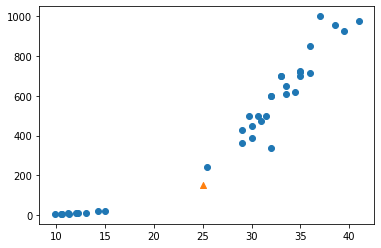

In [22]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.show()

In [41]:
distances,indexes=kn.kneighbors([[25,150]])

In [42]:
distances

array([[150.24524979, 150.25805338, 150.35871414, 150.43446443,
        150.71926768]])

In [43]:
indexes

array([[10, 35, 17,  4,  7]])

In [44]:
print(train_input[indexes])

[[[  37.  1000. ]
  [  41.   975. ]
  [  38.5  955. ]
  [  39.5  925. ]
  [  36.   850. ]]]


In [45]:
mean=np.mean(train_input,axis=0)
std=np.std(train_input,axis=0)

In [46]:
train_scaled=(train_input-mean)/std

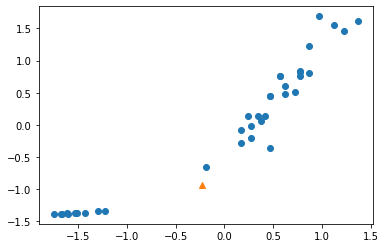

In [47]:
new=([25,150]-mean)/std

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')

In [48]:
kn.fit(train_scaled,train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [49]:
test_scaled=(test_input-mean)/std

In [50]:
test_scaled

array([[-1.63258863, -1.37457062],
       [-1.55244793, -1.37395199],
       [ 0.24070039, -0.01267317],
       [-1.55244793, -1.37364268],
       [-0.07986244, -0.35291555],
       [-1.4923424 , -1.3631261 ],
       [ 0.67145669,  0.71420828],
       [ 0.67145669,  0.3739659 ],
       [ 1.12224816,  1.44108972],
       [ 0.77163257,  0.69874271],
       [-0.09989762, -0.50757117],
       [ 0.37092904,  0.14198246],
       [ 1.37268787,  1.5338831 ]])

In [51]:
kn.score(test_scaled,test_target)

1.0

In [52]:
kn.predict([new])

array([1.])

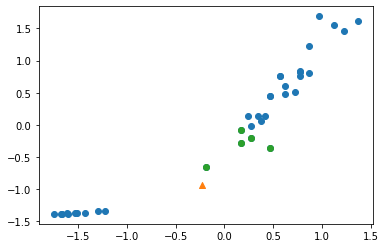

In [55]:
distances,indexes=kn.kneighbors([new])

plt.scatter(train_scaled[:,0],train_scaled[:,1])  # 표준점수 취한것
plt.scatter(new[0],new[1],marker="^") #25,150 
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1]) #25,150과 가까운것